In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Datset A: Exploration, Dimensionality Reduction and Clustering

(a) Generate density plots for the first 20 features. Include the figure in your report and state what you observe.

In [2]:
df = pd.read_csv('../Data/A_NoiseAdded.csv', index_col=0)
df.head()

,Fea1,Fea2,Fea3,Fea4,Fea5,Fea6,Fea7,Fea8,Fea9,Fea10,...,Fea492,Fea493,Fea494,Fea495,Fea496,Fea497,Fea498,Fea499,Fea500,classification
Sample1,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,4.532599,0.000000,0.000000,0.000000,0.000000,0.000000,2
Sample2,0.788640,0.896672,0.677563,0.299002,3.713572,0.618283,1.019398,3.071274,0.718297,1.914438,...,0.61606,1.303487,0.395216,4.702641,0.000000,0.000000,0.460642,0.359130,0.277111,2
Sample3,0.808726,0.000000,0.110553,2.099403,3.218876,0.000000,2.329806,0.057499,0.000000,0.443340,...,0.99820,0.607323,0.451691,4.069050,1.404513,1.076856,0.000000,0.000000,0.000000,2
Sample4,0.000000,0.000000,0.000000,0.000000,3.433987,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,3.258097,0.000000,0.000000,0.000000,0.693147,0.000000,2
Sample5,0.000000,0.000000,0.000000,0.000000,3.951244,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,3.761200,0.000000,0.000000,0.000000,0.000000,0.000000,2


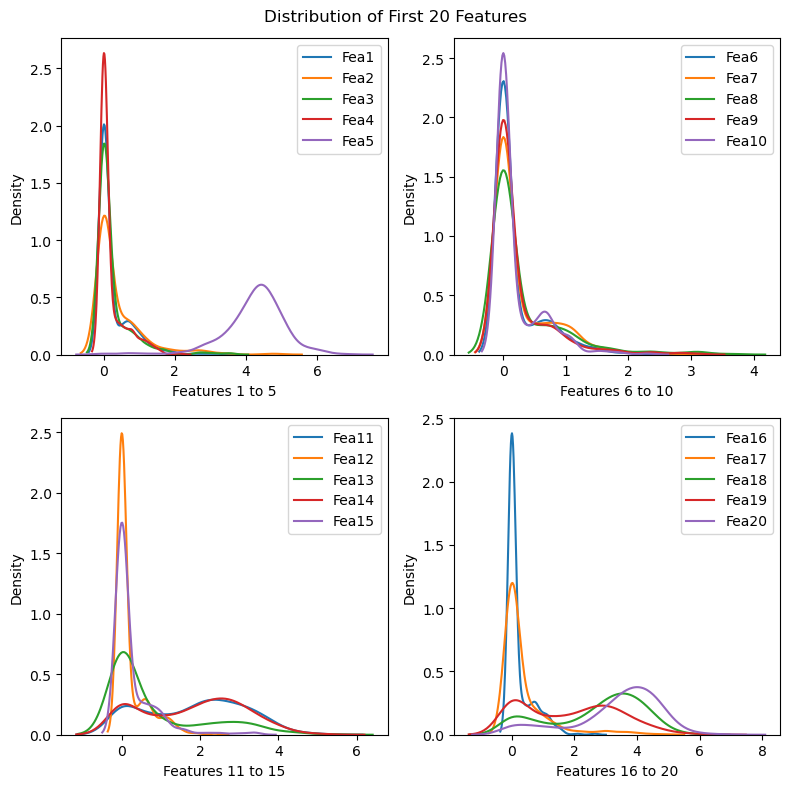

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Distribution of First 20 Features')

block_size = 5
for i in range(0, 20, block_size):
    plt.subplot(2, 2, i//block_size+1)
    for j in range(block_size):
        sns.kdeplot(df.iloc[:, i+j], label=df.columns[i+j])
    plt.legend()
    plt.xlabel(f'Features {i+1} to {i+block_size}')
plt.tight_layout()
plt.savefig('../Plots/Q1a_First20Features.png')
plt.show()

General points:
- All features positive
- Most features centered around 0
- All features are in the same order of magnitude

(b) Apply PCA to visualise the features in 2D and include this visualisation in your report. Comment on what you observe and refer this back to the density plots.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


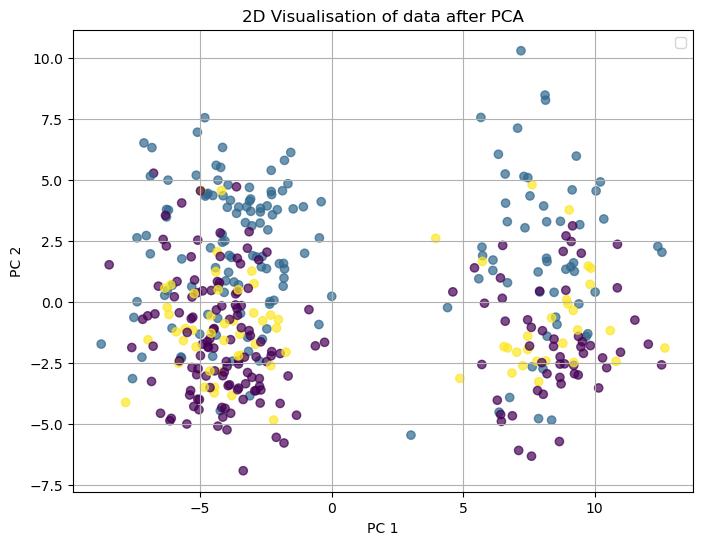

In [4]:
from sklearn.decomposition import PCA

# apply PCA to data to visualise in 2D
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)

# plot the transformed data
plt.figure(figsize=(8, 6))
# colour of points based on label (classification) and legend
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df.classification, alpha=0.7)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title('2D Visualisation of data after PCA')
plt.savefig('../Plots/Q1b_PCA.png')
plt.grid(True)

Comments:
- PCA transformed data shows linear separability

(c) Partition the data into two training sets of equal sizes. Apply k-means clustering to each training set, using the default scikit-learn parameters. In each case, the unused data can be mapped onto the learned clusters. In your report, briefly explain how and why this is possible. Compare both clusterings for the combined training set, using a contingency table.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Set random state
np.random.seed(42)

# Get features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]  # KMeans unsupervised learning, so no need for y

# Divide data into two training sets of equal sizes
train1, train2 = train_test_split(X, test_size=0.5, random_state=42)

# Apply K-means to each training set, using default parameters
kmeans1 = KMeans().fit(train1)
kmeans2 = KMeans().fit(train2)

# For each training set, map data not used onto clusters that were learned from kmeans
pred1 = kmeans1.predict(X)
pred2 = kmeans2.predict(X)

# compare the two sets of predictions using contingency table
tab = pd.crosstab(pred1, pred2, rownames=['pred1'], colnames=['pred2'])

# include sums of rows and columns
tab.loc['Total'] = tab.sum()
tab['Total'] = tab.sum(axis=1)
tab

/Users/daniel/opt/anaconda3/envs/cambridge/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daniel/opt/anaconda3/envs/cambridge/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


pred2,0,1,2,3,4,5,6,7,Total
pred1,,,,,,,,,
0,0,0,0,0,0,1,0,0,1
1,14,48,0,72,0,69,0,0,203
2,0,0,0,0,6,0,0,22,28
3,0,0,0,0,2,0,0,1,3
4,0,0,0,0,4,0,0,4,8
5,44,9,0,7,0,8,0,0,68
6,0,0,2,0,34,0,3,56,95
7,0,0,0,0,1,0,0,1,2
Total,58,57,2,79,47,78,3,84,408


In [6]:
def plot_side_by_side_clustering_results(df_pca, pred1, pred2, filename):
    plt.figure()
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    title = 'K-means Clustering of Training Set '

    axes[0].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5, c=pred1)
    axes[0].set_title(title + '1')
    axes[0].set_xlabel('PC 1')
    axes[0].set_ylabel('PC 2')

    axes[1].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5, c=pred2)
    axes[1].set_title(title + '2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

    plt.tight_layout()
    plt.savefig(f'../Plots/{filename}.png')
    plt.show()

<Figure size 640x480 with 0 Axes>

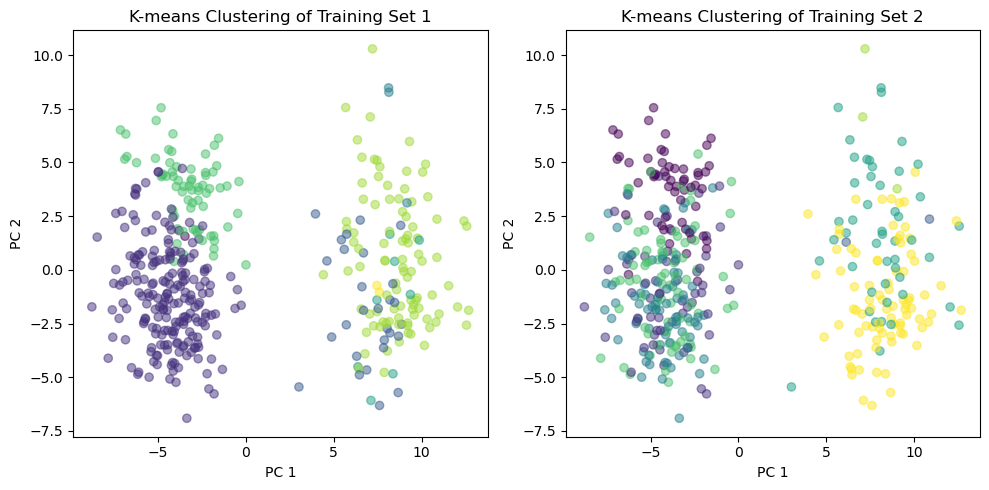

In [7]:
plot_side_by_side_clustering_results(df_pca, pred1, pred2, 'Q1c_KMeans_Default')

(d) Comment on the size of the clusters and the cluster stability in your report, and repeat k-means clustering with a different number of clusters.

Sum of the cluster sizes are very small (e.g. of sizes 1 to 4). This is likely there are too many clusters for the data. The clusters are not stable as the cluster sizes change significantly when the models are re-fit.

In [8]:
df['classification'].value_counts()

classification
1    174
2    162
4     72
Name: count, dtype: int64

In [9]:
# Set random state
np.random.seed(42)

# Repeat for different number of clusters
kmeans1 = KMeans(n_clusters=3).fit(train1)
kmeans2 = KMeans(n_clusters=3).fit(train2)

# For each training set, map data not used onto clusters that were learned from kmeans
pred1 = kmeans1.predict(X)
pred2 = kmeans2.predict(X)

# compare the two sets of predictions using contingency table
tab = pd.crosstab(pred1, pred2, rownames=['pred1'], colnames=['pred2'])

# include sums of rows and columns
tab.loc['Total'] = tab.sum()
tab['Total'] = tab.sum(axis=1)
tab

/Users/daniel/opt/anaconda3/envs/cambridge/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/daniel/opt/anaconda3/envs/cambridge/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


pred2,0,1,2,Total
pred1,,,,
0,136,0,0,136
1,0,17,90,107
2,0,135,30,165
Total,136,152,120,408


(e) Identify the k-means clusters within the PCA figure. Comment on the differences between performing
1. k-means followed by PCA visualisation or 
2. PCA followed by k-means.

Which do you think is better in general?

<Figure size 640x480 with 0 Axes>

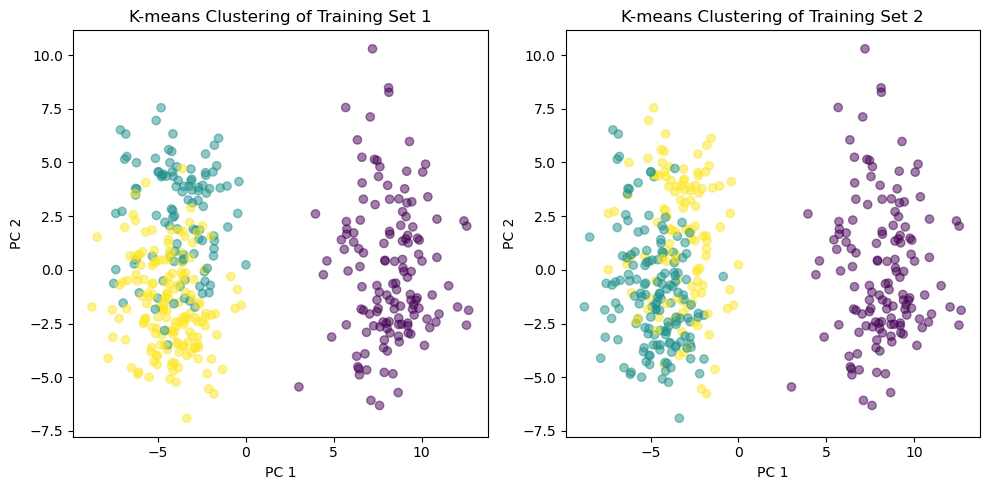

In [10]:
# k-means followed by PCA visualisation
plot_side_by_side_clustering_results(df_pca, pred1, pred2, 'Q1d_KMeans_3Clusters')

/Users/daniel/opt/anaconda3/envs/cambridge/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


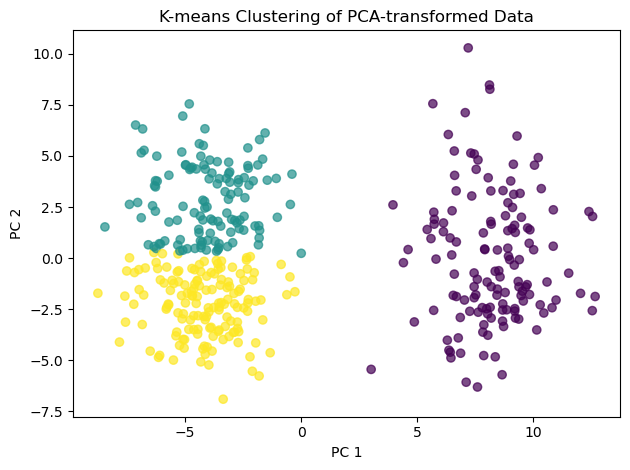

In [11]:
# PCA followed by k-means
X = df_pca

# Fit K-means
kmeans = KMeans(n_clusters=3).fit(X)
pred = kmeans.predict(X)

# Plot results
plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, c=pred)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-means Clustering of PCA-transformed Data')
plt.tight_layout()
plt.savefig('../Plots/Q1e_KMeans_after_PCA.png')
plt.show()

In general, k-means followed by PCA is better because the clusters are fit on the entire dataset. If PCA is performed first, much of the variance (information) could have been removed and so the resulting clusters are not representative or accurate.